471


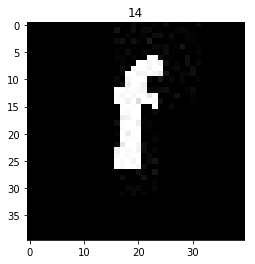

conv1 (?, 40, 40, 16)
pool1 (?, 20, 20, 16)
conv2 (?, 20, 20, 32)
pool2 (?, 10, 10, 32)
con3 (?, 10, 10, 64)
pool3 (?, 5, 5, 64)
flat (?, 1600)
output (?, 1024)
output_drop (?, 1024)
prediction (?, 26)
Step: 0 | train loss: 3.2706 | test accuracy: 0.04
Step: 50 | train loss: 2.3877 | test accuracy: 0.27
Step: 100 | train loss: 0.9476 | test accuracy: 0.41
Step: 150 | train loss: 0.5385 | test accuracy: 0.52
Step: 200 | train loss: 0.7018 | test accuracy: 0.59
Step: 250 | train loss: 0.3790 | test accuracy: 0.64
Step: 300 | train loss: 0.4444 | test accuracy: 0.68
Step: 350 | train loss: 0.2782 | test accuracy: 0.71
Step: 400 | train loss: 0.2961 | test accuracy: 0.73
Step: 450 | train loss: 0.1708 | test accuracy: 0.75
Step: 500 | train loss: 0.1391 | test accuracy: 0.77
Step: 550 | train loss: 0.1560 | test accuracy: 0.78
Step: 600 | train loss: 0.2519 | test accuracy: 0.79
Step: 650 | train loss: 0.1074 | test accuracy: 0.81
Step: 700 | train loss: 0.0976 | test accuracy: 0.81
Step: 

In [3]:
#!/usr/bin/python
#coding:utf-8
import tensorflow as tf
import Get_Database
import numpy as np
import matplotlib.pyplot as plt

trainset_path = "/home/nfd/tensorflow/project/Valified_Code_Classify/Dataset/train_set1"
testset_path = "/home/nfd/tensorflow/project/Valified_Code_Classify/Dataset/test"
data = Get_Database.Data(trainset_path, testset_path)

BATCH_SIZE = 100
LR = 0.0001              # learning rate


# plot one example
print(len(data.test_images))    # 
# print(data.test_labels)   #
plt.imshow(data.test_images[0].reshape((40, 40)), cmap='gray')
plt.title('%i' % np.argmax(data.test_labels[0]))
plt.show()

tf_x = tf.placeholder(tf.float32, [None, 40*40]) / 255.
image = tf.reshape(tf_x, [-1, 40, 40, 1])              # (batch, height, width, channel)
tf_y = tf.placeholder(tf.int32, [None, 26])            # input y
rate = tf.placeholder(tf.float32)

# def weight_variable(shape):
#     initial = tf.truncated_normal(shape, stddev=0.1)
#     return tf.Variable(initial)

# def bias_variable(shape):
#     initial = tf.constant(0.1, shape=shape)
#     return tf.Variable(initial)
# CNN
conv1 = tf.layers.conv2d(   # shape (40, 40, 1)
    inputs=image,
    filters=16,
    kernel_size=5,
    strides=1,
    padding='same',
    activation=tf.nn.relu
)           # -> (40, 40, 16)
print('conv1', conv1.shape)
pool1 = tf.layers.max_pooling2d(
    conv1,
    pool_size=2,
    strides=2,
)           # -> (20, 20, 16)
print('pool1', pool1.shape)
conv2 = tf.layers.conv2d(pool1, 32, 5, 1, 'same', activation=tf.nn.relu)    # -> (20, 20, 32)
print('conv2', conv2.shape)
pool2 = tf.layers.max_pooling2d(conv2, 2, 2)    # -> (10, 10, 32)
print('pool2', pool2.shape)

conv3 = tf.layers.conv2d(pool2, 64, 5, 1, 'same', activation=tf.nn.relu)    # -> (10, 10, 64)
print('con3', conv3.shape)
pool3 = tf.layers.max_pooling2d(conv3, 2, 2)    # -> (5, 5, 64)
print('pool3', pool3.shape)

flat = tf.reshape(pool3, [-1, 5*5*64])          # -> (5*5*32, )
print('flat', flat.shape)
output = tf.layers.dense(flat, 1024) # output layer
print('output', output.shape)
output_drop = tf.layers.dropout(output, rate)
print('output_drop', output.shape)


prediction = tf.layers.dense(output_drop,26)
print('prediction', prediction.shape)
# prediction = tf.nn.softmax(tf.matmul(output_drop, W_fc2) + b_fc2)

loss = tf.losses.softmax_cross_entropy(onehot_labels=tf_y, logits=prediction)           # compute cost
train_op = tf.train.AdamOptimizer(LR).minimize(loss)

accuracy = tf.metrics.accuracy(          # return (acc, update_op), and create 2 local variables
    labels=tf.argmax(tf_y, axis=1), predictions=tf.argmax(prediction, axis=1),)[1]

saver = tf.train.Saver()

sess = tf.Session()

init_op = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer()) # the local var is for accuracy_op
sess.run(init_op)     # initialize var in graph

for step in range(10000):
    batch = data.next_batch(BATCH_SIZE)
    _, loss_ = sess.run([train_op, loss], {tf_x: batch[0], tf_y: batch[1], rate: 0.5 })
#     sess.run(train_op,feed_dict={tf_x: batch_xs, tf_y: batch_ys})
    if step % 50 == 0:
#         print('Step:', step, '| train loss: %.4f' % loss_)
        accuracy_ = sess.run(accuracy, {tf_x: data.test_images, tf_y: data.test_labels, rate: 1.0})
        print('Step:', step, '| train loss: %.4f' % loss_, '| test accuracy: %.2f' % accuracy_)
#         acc = sess.run(accuracy, feed_dict = {tf_x:mnist.test.images, tf_y:mnist.test.labels})
#         print(acc)
        #print('Step:', step, '| train loss: %.4f' % loss, '| test accuracy: %.2f' % accuracy)
        
        
# print 10 predictions from test data
test_output = sess.run(prediction, {tf_x: data.test_images[:20]})
print('test_output', test_output.shape)
pred_y = np.argmax(test_output, 1)
print('pred_y', pred_y.shape)
print(pred_y, 'prediction number')
print(np.argmax(data.test_labels[:20], 1), 'real number')

save_path = saver.save(sess, 'my_net/VerfiedCode_net.ckpt')
print ('Model saved in file: ', save_path)